181543306林旋华

 不断变化的移动环境是一个充满挑战的导航空间。移动设备在台式机上的百分比仅在增加。Android占据智能手机市场约53.2％，而iOS则占43％。为了吸引更多人下载您的应用，您需要确保他们可以轻松找到您的应用。移动应用程序分析是了解现有策略以促进增长和保留未来用户的一种好方法。

如今，随着数以百万计的应用程序的使用，以下数据集已成为在iOS应用程序商店中获取最流行应用程序的关键。此数据集包含7000多个Apple iOS移动应用程序详细信息。数据是从Apple Inc.网站上的iTunes Search API中提取的，为了分析App特性，从Kaggle中找到数据集。(https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)

# 内容：
appleStore.csv
“ id”：应用程序ID

“ track_name”：应用名称

“ size_bytes”：大小（以字节为单位）

“货币”：货币类型

“价格”：价格金额

“ rating_count_tot”：用户评分计数（所有版本）

“ rating_count_ver”：用户评分计数（当前版本）

“ user_rating”：平均用户评级值（对于所有版本）

“ user_rating_ver”：平均用户评分值（当前版本）

“ ver”：最新版本代码

“ cont_rating”：内容分级

“ prime_genre”：主要类型

“ sup_devices.num”：支持设备的数量

“ ipadSc_urls.num”：显示的屏幕截图数量

“ lang.num”：支持的语言数量

“ vpp_lic”：启用基于Vpp设备的许可

In [1]:
import numpy as np
import pandas as pd
from pyecharts.globals import ThemeType
from pyecharts.faker import Faker
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.charts import Line
from pyecharts.charts import Bar, Grid, Line,Scatter,Tab

In [2]:
#数据文件的读取
r1=pd.read_csv(r"archive/AppleStore.csv")
r1.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
len(r1)

7197

# 图1总体APP分析 饼图

In [3]:
#按类别分组groupby
p0=r1.groupby('prime_genre').size().sort_values(ascending=False)

In [6]:
from pyecharts.charts import Page, Pie
from pyecharts import options as opts
#设置风格（总结：ThemeType.LIGHTLIGHT、DARK、CHALK、ESSOS、INFOGRAPHIC、MACARONS、
#PURPLE_PASSION、ROMA、ROMANTIC、SHINE、VINTAGE、WALDEN、WESTEROS、WONDERLAND）
f2=Pie(init_opts=opts.InitOpts(theme=ThemeType.DARK)).add("", [list(z) for z in zip(p0.index.tolist(), p0.tolist())])
f2.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
f2.set_global_opts(
            title_opts=opts.TitleOpts(title="总体APP分析"),
            legend_opts=opts.LegendOpts(
                orient="vertical", pos_top="15%", pos_left="2%"
            ),
        )
f2.render_notebook()

# 图2 箱型图 APP分类箱线图（异常值分析）

In [7]:
from pyecharts.charts import Boxplot
def c1(x):
    return x.price.values
t3=r1.groupby("prime_genre").apply(c1)
t3

prime_genre
Book                 [0.0, 3.99, 0.0, 6.99, 0.0, 2.99, 1.99, 9.99, ...
Business             [5.99, 2.99, 0.0, 3.99, 0.99, 0.0, 4.99, 0.99,...
Catalogs             [0.0, 0.0, 7.99, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Education            [4.99, 3.99, 1.99, 249.99, 0.0, 1.99, 0.0, 3.9...
Entertainment        [0.99, 1.99, 1.99, 4.99, 0.99, 0.0, 0.0, 0.0, ...
Finance              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.99, 0.0, 0.0,...
Food & Drink         [0.0, 0.0, 1.99, 0.0, 0.99, 0.0, 0.0, 4.99, 4....
Games                [3.99, 0.99, 3.99, 4.99, 7.99, 4.99, 2.99, 2.9...
Health & Fitness     [0.0, 1.99, 0.99, 0.0, 0.0, 2.99, 2.99, 4.99, ...
Lifestyle            [0.99, 2.99, 0.0, 0.0, 4.99, 3.99, 2.99, 0.99,...
Medical              [4.99, 13.99, 0.0, 24.99, 19.99, 9.99, 2.99, 0...
Music                [0.0, 0.0, 3.99, 4.99, 0.0, 0.0, 0.0, 12.99, 0...
Navigation           [3.99, 4.99, 1.99, 74.99, 0.0, 19.99, 0.0, 3.9...
News                 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.9

In [8]:
x=["Book","Business","Catalogs","Education",'Entertainment','Finance','Food & Drink','Games','Health & Fitness','Lifestyle','Medical',
   'Medical','Music','Navigation','News','Photo & Video','Productivity','Reference','Shopping','Social Networking','Social Networking','Sports'
  ,'Sports','Travel','Utilities','Weather']
y=[t3[x[0]],t3[x[1]],t3[x[2]],t3[x[3]],t3[x[4]],t3[x[5]],t3[x[6]],t3[x[7]],t3[x[8]],t3[x[9]],t3[x[10]],t3[x[11]],t3[x[12]],t3[x[13]],t3[x[14]],t3[x[15]],t3[x[16]],t3[x[17]],
  t3[x[18]],t3[x[19]],t3[x[20]],t3[x[21]],t3[x[22]],t3[x[23]],t3[x[24]],t3[x[25]]]
c = Boxplot(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
c.add_xaxis(x).add_yaxis("price", c.prepare_data(y))
c.set_global_opts(title_opts=opts.TitleOpts(title="price"),
                 datazoom_opts=opts.DataZoomOpts(is_show=True))
c.render_notebook()

# 图3游戏APP总版本评分计数柱形图

In [10]:
p1=r1[r1.prime_genre=='Games'].groupby('user_rating').size().sort_index(ascending=False)
p1

user_rating
5.0     277
4.5    1664
4.0     927
3.5     301
3.0     133
2.5      44
2.0      29
1.5      10
1.0      15
0.0     462
dtype: int64

In [13]:
import json
import os

from pyecharts import options as opts
from pyecharts.charts import Page, PictorialBar
from pyecharts.globals import SymbolType


def pictorialbar_base() -> PictorialBar:
    c = (PictorialBar(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE)).add_xaxis(p1.index.tolist()).add_yaxis("游戏APP总版本评分计数柱形图",p1.tolist()).set_series_opts(
            label_opts=opts.LabelOpts(is_show=False),
            markpoint_opts=opts.MarkPointOpts(
                data=[
                    opts.MarkPointItem(type_="max", name="最大值"),
                    opts.MarkPointItem(type_="min", name="最小值"),
                    opts.MarkPointItem(type_="average", name="平均值"),
                ]
            )))
    return c

pictorialbar_base().render_notebook()


# 图4优质游戏APP-price计数柱形图

In [9]:
r1.rating_count_tot.mean() #所有版本的评价人数比较多

12892.907183548701

In [11]:
r1.rating_count_ver.mean() #先行版的评价人数

460.3739057940809

In [12]:
p2=r1[(r1.rating_count_tot>12892.907183548701)&(r1.user_rating>4)].price.value_counts()  #采用所有版数据
p2

0.00    501
0.99     36
2.99     26
1.99     18
4.99     13
6.99      7
3.99      4
9.99      2
Name: price, dtype: int64

In [13]:
r1[(r1.rating_count_tot>12892.907183548701)&(r1.user_rating>4)].price.mean()

0.4924876441515657

In [14]:
from pyecharts.charts import Bar


def bar_base() -> Bar:
    c = (Bar(init_opts=opts.InitOpts(theme=ThemeType.ESSOS)).add_xaxis(p2.index.tolist()).add_yaxis("",p2.tolist()).set_series_opts(
            label_opts=opts.LabelOpts(is_show=False),
            markpoint_opts=opts.MarkPointOpts(
                data=[
                    opts.MarkPointItem(type_="max", name="最大值"),
                    opts.MarkPointItem(type_="min", name="最小值"),
                    opts.MarkPointItem(type_="average", name="平均值"),
                ]
            )))
    return c
bar_base().render_notebook()

# 图5 一般游戏APP-price计数柱形图

In [15]:
r1[(r1.rating_count_tot<12892.907183548701)&(r1.user_rating<4)].price.mean()

1.379311846689863

In [16]:
r1.price=r1.price*6.99 #中美汇率  转化称人民币价格

In [17]:
p3=r1[(r1.rating_count_tot<12892.907183548701)&(r1.user_rating<4)].price.value_counts()

from pyecharts.charts import Bar


def bar_base() -> Bar:
    c = (Bar(init_opts=opts.InitOpts(theme=ThemeType.ESSOS)).add_xaxis(p3.index.tolist()).add_yaxis("一般游戏APP-price计数柱形图",p3.tolist()).set_series_opts(
            label_opts=opts.LabelOpts(is_show=False),
            markpoint_opts=opts.MarkPointOpts(
                data=[
                    opts.MarkPointItem(type_="max", name="最大值"),
                    opts.MarkPointItem(type_="min", name="最小值"),
                    opts.MarkPointItem(type_="average", name="平均值"),
                ]
            )))
    return c
bar_base().render_notebook()

# 图6 优质和相对一般的游戏APP的支持设备计数柱形对比图

In [18]:
r1[(r1.rating_count_tot>12892.907183548701)&(r1.user_rating>4)].price.mean()

3.4424886326194457

In [19]:
p4=r1[(r1.rating_count_tot>12892.907183548701)&(r1.user_rating>4)]['sup_devices.num'].value_counts()
p5=r1[(r1.rating_count_tot<12892.907183548701)&(r1.user_rating<4)]['sup_devices.num'].value_counts()
p0=pd.concat([p4,p5],axis=1,sort=False,keys=['0','1']).fillna(0)
p0

,0,1
12,1.0,0.0
13,0.0,3.0
16,0.0,2.0
23,0.0,1.0
24,18.0,78.0
25,1.0,23.0
26,0.0,23.0
33,0.0,1.0
35,0.0,6.0
36,0.0,3.0


In [30]:
bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.ESSOS))
bar.add_xaxis(p0['0'].index.tolist())
bar.add_yaxis("相对一般的游戏APP- sup_devices.num计数柱形图", p0['1'].tolist())
bar.set_global_opts(title_opts=opts.TitleOpts(title='款式')
                  )


bar1 = Bar(init_opts=opts.InitOpts(theme=ThemeType.ESSOS))
bar1.add_xaxis(p0['0'].index.tolist())
bar1.add_yaxis("优质游戏APP- sup_devices.num计数柱形图", p0['0'].tolist())
bar1.set_global_opts(title_opts=opts.TitleOpts(title='款式'))

g1 =Tab()
g1.add(bar, "相对一般的游戏APP- sup_devices.num计数柱形图")
g1.add(bar1,"优质游戏APP- sup_devices.num计数柱形图")
g1.render_notebook()

# 图7 APP名字词云图

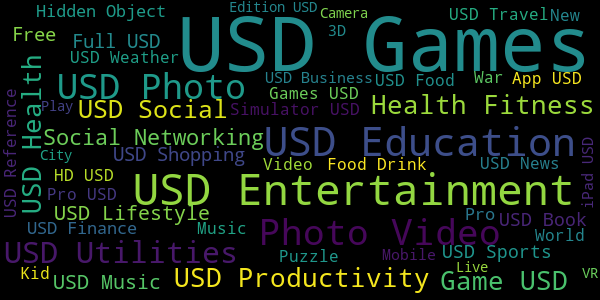

In [20]:
from wordcloud import WordCloud
with open("archive/AppleStore.csv" ,encoding="utf-8")as file:
    text=file.read()
wordcloud=WordCloud(
    background_color="black",width=600,
    height=300,max_words=50).generate(text)
image=wordcloud.to_image()
image